In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [3]:
# Your code here
taxi = pd.read_csv("./data/2019_Yellow_Taxi_Trip_Data.csv")
taxi.shape, taxi.columns

((10000, 18),
 Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
        'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge'],
       dtype='object'))

In [5]:
cols = ["fare_amount", "tip_amount", "tolls_amount", "total_amount"]
taxi[cols].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [8]:
# Your code here
taxi.loc[taxi["trip_distance"] == taxi["trip_distance"].max(), cols+["trip_distance"]]

,fare_amount,tip_amount,tolls_amount,total_amount,trip_distance
8338,176.0,18.29,6.12,201.21,38.11


<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [20]:
# Your code here
met = pd.read_csv("./data/Meteorite_Landings.csv")
met.sample(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
14057,Grove Mountains 021838,47867,Valid,L6,0.99,Found,01/01/2003 12:00:00 AM,-72.781944,75.323056,"(-72.781944, 75.323056)"
39630,Yamato 790333,25682,Valid,H3.6,17.73,Found,01/01/1979 12:00:00 AM,-71.500000,35.666670,"(-71.5, 35.66667)"
38916,Yamato 74488,24866,Valid,H6,55.27,Found,01/01/1974 12:00:00 AM,0.000000,35.666670,"(0.0, 35.66667)"
4771,Asuka 881882,4591,Valid,H4,32.59,Found,01/01/1988 12:00:00 AM,-72.000000,26.000000,"(-72.0, 26.0)"
38461,Yamato 74035,24413,Valid,L6,115.70,Found,01/01/1974 12:00:00 AM,-71.801670,36.143060,"(-71.80167, 36.14306)"


In [21]:
met.rename(columns={"mass (g)": "mass"}, inplace=True)
met.drop(["reclat", "reclong", "GeoLocation"], axis=1, inplace=True)
met.sort_values(by="mass", ascending=False)

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [23]:
met.year.isna().sum()

291

In [24]:
# Your code here
met.dtypes

name         object
id            int64
nametype     object
recclass     object
mass        float64
fall         object
year         object
dtype: object

In [25]:
# met.loc["year"] = met.loc["year"].str.slice(7,11)
met.year.str.slice(6,11)

0        1880 
1        1951 
2        1952 
3        1976 
4        1902 
         ...  
45711    1990 
45712    1999 
45713    1939 
45714    2003 
45715    1976 
Name: year, Length: 45716, dtype: object

In [27]:
met.year = met.year.str.slice(6,11)

In [28]:
met.year = met.year.astype("Int64")

In [29]:
met.fell_before_1970 = met.year < 1970
met.fell_before_1970

/var/folders/jb/xwzxx_tj4pg_skkg_c5k0_6r0000gn/T/ipykernel_26754/2398276513.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  met.fell_before_1970 = met.year < 1970


0         True
1         True
2         True
3        False
4         True
         ...  
45711    False
45712    False
45713     True
45714    False
45715    False
Name: year, Length: 45716, dtype: boolean

In [30]:
met = met.set_index("id")
met

,name,nametype,recclass,mass,fall,year
id,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880
2,Aarhus,Valid,H6,720.0,Fell,1951
6,Abee,Valid,EH4,107000.0,Fell,1952
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976
370,Achiras,Valid,L6,780.0,Fell,1902
...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999
30410,Zlin,Valid,H4,3.3,Found,1939


In [37]:
# 10,036 and 10,040 (inclusive) 

met = met.sort_index()
met.loc[10036:10040]

# met.loc[(met.index >= 10036) & (met.index <= 10040)]

,name,nametype,recclass,mass,fall,year
id,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883
10038,Enshi,Valid,H5,8000.0,Fell,1974
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [42]:
# Your code here
met.loc[met["year"] == met["year"].max()]

,name,nametype,recclass,mass,fall,year
id,,,,,,
57150,Northwest Africa 7701,Valid,CK6,55.0,Found,2101


There's a meteorite that was reportedly found in the future:

_This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150))._

<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [51]:
taxi = pd.read_csv("./data/2019_Yellow_Taxi_Trip_Data.csv")

In [52]:
# Your code here
taxi.sample(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4013,2,2019-10-23T16:42:02.000,2019-10-23T17:33:42.000,1,10.85,1,N,132,61,2,42.0,1.0,0.5,0.00,0.0,0.3,43.80,0.0
304,2,2019-10-23T16:31:45.000,2019-10-23T16:35:15.000,1,0.56,1,N,90,234,1,4.5,1.0,0.5,2.20,0.0,0.3,11.00,2.5
1065,1,2019-10-23T16:02:42.000,2019-10-23T16:16:06.000,1,2.30,1,N,262,41,2,10.5,3.5,0.5,0.00,0.0,0.3,14.80,2.5
2299,2,2019-10-23T16:59:41.000,2019-10-23T17:09:44.000,1,1.76,1,N,87,232,1,9.0,1.0,0.5,2.66,0.0,0.3,15.96,2.5
5143,2,2019-10-23T16:33:37.000,2019-10-23T16:43:13.000,1,2.27,1,N,264,236,2,9.5,1.0,0.5,0.00,0.0,0.3,13.80,2.5


In [53]:
taxi["tpep_dropoff_datetime"] = pd.to_datetime(taxi["tpep_dropoff_datetime"])

In [54]:
taxi.set_index("tpep_dropoff_datetime", inplace=True)

In [57]:
taxi_H = taxi.resample("h")

In [67]:
taxi_H[cols].sum()

,fare_amount,tip_amount,tolls_amount,total_amount
tpep_dropoff_datetime,,,,
2019-10-23 07:00:00,4.50,0.00,0.00,8.80
2019-10-23 08:00:00,62.50,4.00,0.00,72.60
2019-10-23 09:00:00,58.00,0.00,0.00,67.60
2019-10-23 10:00:00,0.00,0.00,0.00,0.00
2019-10-23 11:00:00,0.00,0.00,0.00,0.00
2019-10-23 12:00:00,13.50,2.20,0.00,20.00
2019-10-23 13:00:00,35.50,4.45,0.00,52.85
2019-10-23 14:00:00,90.00,11.64,0.00,123.14
2019-10-23 15:00:00,213.50,51.75,0.00,333.25


In [61]:
taxi_H[cols].sum().sum()

fare_amount     151063.13
tip_amount       26344.94
tolls_amount      6234.47
total_amount    225646.59
dtype: float64

In [66]:
taxi_H["tip_amount"].sum().sort_values(ascending=False)[0:5]

tpep_dropoff_datetime
2019-10-23 16:00:00    12228.64
2019-10-23 17:00:00    12044.03
2019-10-23 18:00:00     1907.64
2019-10-23 15:00:00       51.75
2019-10-23 19:00:00       25.74
Name: tip_amount, dtype: float64

<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [102]:
# Your code here
tsa = pd.read_csv("./data/tsa_melted_holiday_travel.csv")
tsa.shape, tsa.columns

((864, 4), Index(['date', 'year', 'travelers', 'holiday'], dtype='object'))

In [103]:
tsa.sample(5)

,date,year,travelers,holiday
729,2020-12-31,2020,874406.0,New Year's Eve
509,2020-05-25,2020,340769.0,Memorial Day
101,2019-04-12,2019,2484580.0,NaN
454,2020-03-31,2020,136023.0,NaN
597,2020-08-21,2020,764468.0,NaN


<Axes: title={'center': 'travelers'}, xlabel='year'>

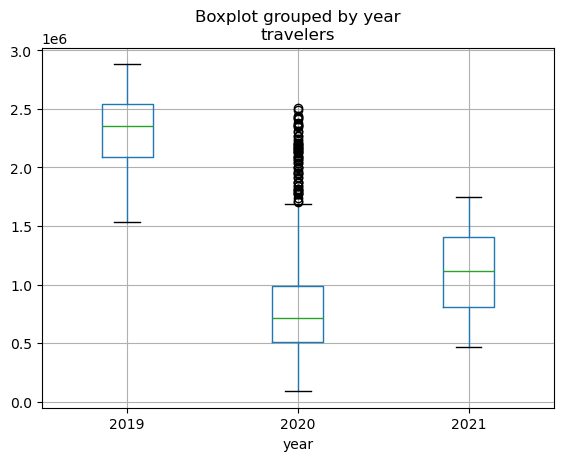

In [116]:
tsa.boxplot(column="travelers", by="year")

<Axes: xlabel='year', ylabel='travelers'>

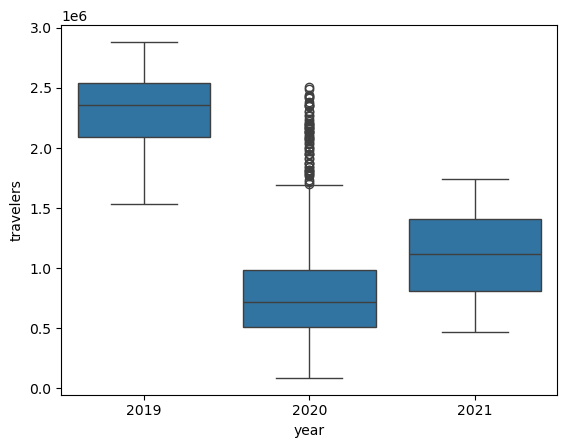

In [104]:
sns.boxplot(x="year", y="travelers", data=tsa)

<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

In [107]:
# Your code here
tsa_2019 = tsa[tsa["year"] == 2019]
tsa_2019

,date,year,travelers,holiday
0,2019-01-01,2019,2126398.0,New Year's Day
1,2019-01-02,2019,2345103.0,New Year's Day
2,2019-01-03,2019,2202111.0,NaN
3,2019-01-04,2019,2150571.0,NaN
4,2019-01-05,2019,1975947.0,NaN
...,...,...,...,...
360,2019-12-27,2019,2575985.0,NaN
361,2019-12-28,2019,2500396.0,NaN
362,2019-12-29,2019,2009880.0,New Year's Eve
363,2019-12-30,2019,2133253.0,New Year's Eve


In [108]:
tsa_2019["date"] = pd.to_datetime(tsa_2019["date"])

/var/folders/jb/xwzxx_tj4pg_skkg_c5k0_6r0000gn/T/ipykernel_26754/2889308052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["date"] = pd.to_datetime(tsa_2019["date"])


In [112]:
tsa_2019["day_of_week"] = tsa_2019["date"].dt.dayofweek
tsa_2019["month"] = tsa_2019["date"].dt.month

/var/folders/jb/xwzxx_tj4pg_skkg_c5k0_6r0000gn/T/ipykernel_26754/638151492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["day_of_week"] = tsa_2019["date"].dt.dayofweek
/var/folders/jb/xwzxx_tj4pg_skkg_c5k0_6r0000gn/T/ipykernel_26754/638151492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["month"] = tsa_2019["date"].dt.month


In [113]:
tsa_2019.pivot_table(index="day_of_week", 
                             columns="month",
                             values="travelers",
                             aggfunc="median")

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
0,1965342.5,2108074.5,2495543.0,2499461.0,2513732.5,2530726.5,2542365.0,2349372.0,2082179.0,2230216.0,2110044.5,2054380.0
1,1733739.0,1758577.0,2551498.0,2521897.0,2633590.0,2693454.0,2705399.0,2581777.5,2452356.0,2541581.0,2396507.5,2392331.0
2,1763884.0,1982732.0,2200050.5,2001089.5,2570613.0,2729187.5,2730936.0,2643061.0,2515818.0,2594337.0,2490780.5,2485304.5
3,1991328.0,2267561.5,2526468.5,2454865.0,2124825.0,2343896.0,2355385.5,2171962.0,1909112.0,1931971.0,2051548.0,2182328.5
4,2101692.5,2106456.5,2378673.0,2448675.0,2512315.0,2655971.5,2714039.0,2584444.0,2468865.0,2548725.5,2396681.0,2409823.5
5,1602780.0,1897686.5,2122898.0,2155378.0,2351812.0,2644981.0,2625213.5,2567986.0,2387325.0,2457413.0,2403304.0,2370444.5
6,1990412.0,2151817.0,2187298.0,2255325.5,2328201.0,2433189.0,2473318.5,2277137.5,2013050.0,2081132.5,2077552.0,2009112.0


<Axes: xlabel='month', ylabel='day_of_week'>

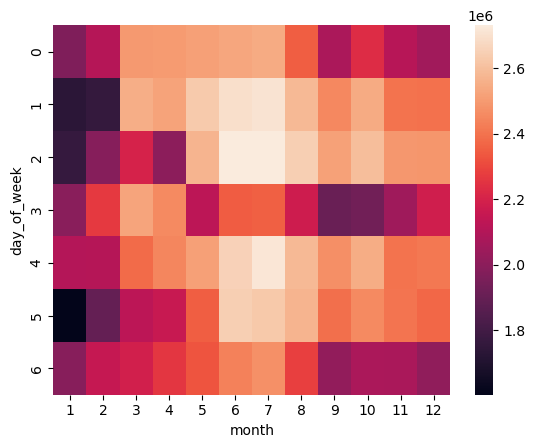

In [114]:
sns.heatmap(data=tsa_2019.pivot_table(index="day_of_week", 
                             columns="month",
                             values="travelers",
                             aggfunc="median"),
            )